In [0]:
/FileStore/tables/Iris.csv

In [0]:
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder \
    .appName("Iris Correlation Analysis") \
    .getOrCreate()

In [0]:
# Read data from URL into DataFrame
file_path = "/FileStore/tables/Iris.csv"
iris_df = spark.read.csv(file_path, header=True, inferSchema=True)

# Show the DataFrame schema and first few rows
iris_df.printSchema()
display(iris_df)

root
 |-- Id: integer (nullable = true)
 |-- SepalLengthCm: double (nullable = true)
 |-- SepalWidthCm: double (nullable = true)
 |-- PetalLengthCm: double (nullable = true)
 |-- PetalWidthCm: double (nullable = true)
 |-- Species: string (nullable = true)



Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa
10,4.9,3.1,1.5,0.1,Iris-setosa


In [0]:
# Calculate correlation
correlation = iris_df.corr("SepalLengthCm", "PetalLengthCm")

print("Correlation between SepalLengthCm and PetalLengthCm :", correlation)

Correlation between SepalLengthCm and PetalLengthCm : 0.8717541573048717


In [0]:
from pyspark.mllib.stat import Statistics
from pyspark.mllib.linalg import Vectors
import pandas as pd

# Select only numeric columns
columns = ["SepalLengthCm",  "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
data = iris_df.select(columns)

# Convert the DataFrame into an RDD of Vectors
rdd_vectors = data.rdd.map(lambda row: Vectors.dense(row))

# Calculate the Pearson correlation matrix using the RDD of Vectors
correlation_matrix = Statistics.corr(rdd_vectors, method="pearson")

correlation_df = pd.DataFrame(correlation_matrix, columns=columns, index=columns)
print("Correlation matrix:")
print(correlation_df)

Correlation matrix:
               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000


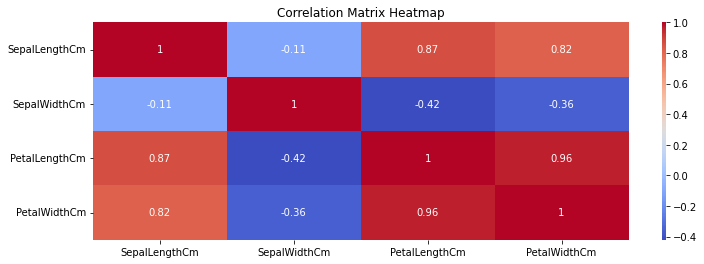

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert the correlation matrix to a Pandas DataFrame
correlation_df = pd.DataFrame(correlation_matrix, columns=columns, index=columns)

# Create the heatmap using Seaborn
plt.figure(figsize=(12, 4))
sns.heatmap(correlation_df, annot=True, cmap="coolwarm", cbar_kws={"aspect": 60})
plt.title("Correlation Matrix Heatmap")
plt.show()